In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [8]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object for the SIR model.
    
    beta: predation rate
    alpha: elk birth rate
    gamma: wolf birth rate based on supply of elk
    delta = wolf death rate
    
    returns: System object
    """
    init = State(elks=1, wolves=1)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, alpha=alpha, delta=delta)

In [9]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [10]:
def update_func(state, t, system):
    """Update the model.
    
    state: State (elks, wolves)
    t: time
    system: System object
    
    returns: State (sir)
    """
    elks, wolves = state

    elk_survival =  (system.alpha * elks) 
    elk_death = (system.beta*elks*wolves)
    wolf_survival = (system.delta*wolves*elks) 
    wolf_death = (system.gamma*wolves)
    
    elks += elk_survival
    elks -= elk_death
    wolves += wolf_survival
    wolves -= wolf_death
    
    return State(elks=elks, wolves = wolves)

In [11]:
def plot_results(elks, wolves):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(elks, '--', label='Elks')
    plot(wolves, '-', label='Wolves')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [12]:
system = make_system(0.05, 0.1, 0.1, 0.1)
results = run_simulation(system, update_func)
results.head()

,elks,wolves
0,1,1
1,0.95,1
2,0.9025,0.995
3,0.857826,0.985299
4,0.816196,0.97129


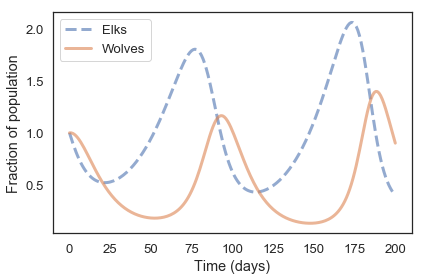

In [13]:
plot_results(results.elks, results.wolves)